## Relevant reading: Bevington Chapt. 1 & 2

In [3]:
import numpy as np              # load numerical module
import matplotlib.pyplot as plt # load plotting module
import astropy.io.fits as fits  # load FITS module


## Before we start with the measurements and statistics, let's talk about a particular astronomical data format you will encounter often: FITS files, and how you can read/display/write them

### What is FITS?  Flexible Image Transport System

- Among oldest computer data formats
- Based on punched cards and magnetic tape!  Still works!

### In the following we will see:
    - Reading FITS files
    - Reading header variables
    - Adding/modifying header variables
    - Writing FITS files
    - Display using DS9
    - Example of np.where() and log scaling

In [4]:
# Get a FITS file and show info about the file
fits.info('pix.fits') 

FileNotFoundError: [Errno 2] No such file or directory: 'pix.fits'

In [ ]:
#Read image data from file
im = fits.getdata('pix.fits') 

In [ ]:
plt.imshow(im)

In [ ]:
im2 = np.where( im > 10 , im, 0)
im2 = 10.*np.log( im2 -10. ) +10

dm = plt.imshow( im2 ,cmap='gray')

In [ ]:
#get the header of your file
hdr = fits.getheader('pix.fits')
print(hdr) # widen terminal to 80 columns first!

In [ ]:
# access and print header keyword value
date = hdr['date'] 
print(date)

In [ ]:
# modify value (that's not a legal date value!)
hdr['date'] = '4th of July' 
hdr['date']


In [ ]:
# this keyword doesn't exist - error
hdr['flatfile'] 


In [ ]:
#but, you can add new keyword flatfile
hdr['flatfile'] = 'flat17.fits' 
print(hdr)

In [ ]:
fits.writeto('newfile.fits', im2, hdr) # create new fits file

In [ ]:
fits.writeto('newfile.fits', im2, hdr) # create another new fits file

In [ ]:
# oops! already file with name exists; but I want to create the new fits file with that name anyway:
fits.writeto('newfile.fits', im2, hdr, overwrite=True) 
#and add data to it
fits.append('existingfile.fits', im2, hdr)
fits.append('existingfile.fits', im2, hdr)
fits.append('existingfile.fits', im2, hdr)

In [ ]:
fits.info("existingfile.fits")

# --------------------------------------
#              Measurements
# --------------------------------------

### Why do we care about measurements in science/engineering/etc?
   - think of getting a frame for your favorite poster w/o measuring its size
    <img src="plots/poster_no_measurement.png" width=200 height=200 />
 
   - think of adding a new window to your house w/o measuring the hole on your wall
   
   - think of making a (micro)chip for a phone w/o constraining the size it needs to be
   
   - think of sending people to the Moon without knowing how far it is from the Earth
   
   - think of the difference that measuring wrong the CH$_4$/CO$_2$ or CFCs emissions has 
   
   - think of making an X-ray at the dentist w/o someone measuring how much radiation the machine emits

### What is a measurement?

### "The difference between an observed or calculated value and the true value" (Webster). An estimate of a quantity in terms of accepted units 
   - what are the "accepted units"?
   - Units and standards: SI vs cgs vs random units
         
        A. (5 min) What is the gravity of the Earth when you use:
        
        1. G = 6.674*10$^{-11}$  
        2. R = 6.371*10$^8$
        3. M = 5.972*10$^{24}$
              
        What is wrong here? What problems can this result to? 
              
 </br>           
   - why is it important to mention your units? </br></br> B. (5 min) A m$_1 =$1 kg mass starts from rest at the top of a frictionless slope that is 1 meter high and inclined at $30^\circ$. At the bottom of the slope, it collides inelastically with a stationary m$_2 =$1500 g mass. Determine the final velocity of the combined masses after the inelastic collision. What happens if you accidentally forget to convert the m$_2$ to kg and keep it in g?
       
   - why is it important to use the same units throughout your code?        

In [5]:
G =  6.674e-11
R = 6.371e8 #1e6 vs 1e8
M = 5.972e24

print( G*M/R**2)

0.000981953203281596


In [6]:
# [m$^3$kg$^{-1}$s$^{-2}$] ; [cm] ; [kg]

In [7]:
#From conservation of momentum m1*u1 + m2 * u2 = (m1+m2) * ufinal => m1*u1 = (m1+m2) * ufinal =>
# ufinal = m1/(m1+m2) * u1

#with u1 from: m1 * g * h = 1/2 * m1 * u1**2 => u1 = np.sqrt( 1 * 9.81 *1 *2 )

m1 = 1
m2 = 1500
u1 = 4.4

ufinal_wrong = u1* m1/(m1+m2) 

m2 = 1.5
ufinal_right = u1* m1/(m1+m2)

print(ufinal_right, ufinal_wrong)

1.7600000000000002 0.0029313790806129248


### Think-Pair-Share (7 min):

### consider measuring one's height with a measure tape going to 2.5m.
 
 <img src="plots/measure_height.png" width=200 height=200 />
 

 - what are all effects that affect the measurement? 
 - What if the tape was only 1m? 
 - What if stick was in half-inches, not centimeters, but we didn’t notice?
 - What if it was a metal stick?

### Fundamental vs derived quantities

- what is the difference? 
- Mention 3 fundamental and 3 derived quantities
- How do you think measurments (and possible unit errors/confusions) affect either category?



## ----------------------- Accuracy vs Precision ----------------------- 

## Accuracy: how close is the measurement to the true value
    - Hard to know, unless we know the absolute truth

## Precision: how well is the result/measurement determined
    - Measure of how reproducible a measurement is
    - The error of your measurements
    


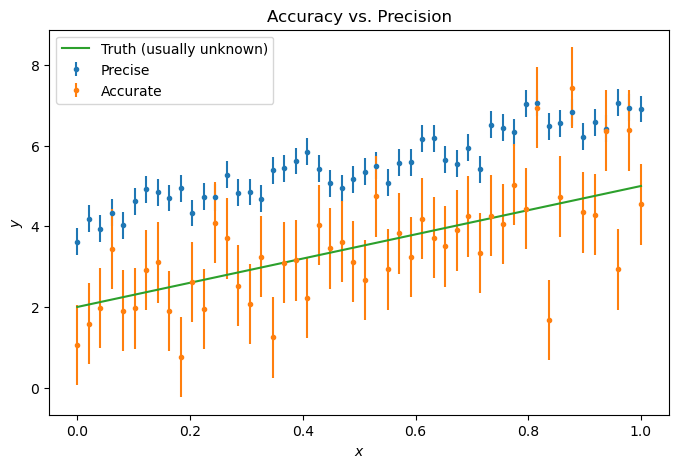

In [8]:
# Accuracy vs. Precision plot.  See also Bevington fig 1.1.

x1   =  0.       # Domain start
x2   =  1.       # Domain end
n    = 50        # Number of points
erra =  1.       # Error bar size for accurate points
errp = erra / 3. # Error bar size for precise points
syserr = 2.      # Amount of systematic error

# Create data sets and error bars
x   = np.linspace(x1, x2, n)  # Sample the domain
y   = 3. * x + 2.             # Truth (usually unknown, but revealed here)

#add the noise:
ya  = y + np.random.normal(0,      erra, size=n) # Accurate y values
yp  = y + np.random.normal(syserr, errp, size=n) # Precise  y values with systematic

yae = erra * np.ones(n)     # Accurate error bar sizes
ype = errp * np.ones(n)     # Precise  error bar sizes

# Plot them
plt.figure( figsize=(8,5) )
plt.errorbar(x, yp, ype, fmt=".", label="Precise")
plt.errorbar(x, ya, yae, fmt=".", label="Accurate")
plt.plot(x, y, label="Truth (usually unknown)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Accuracy vs. Precision')
dummy = plt.legend()

In [9]:
#help(np.random.normal)

### Do you see why one is more precise, but the other more accurate? 


### Think-pair-share (7 min) : 

- Draw four example bullseye where someone has thrown 6 darts. They should show:
     - 1 example of a low accuracy, low precision
     - 1 example of a low accuracy, high precision
     - 1 example of a high accuracy, low precision
     - 1 example of a high accuracy, high precision
    
[//]: # ( <img src="plots/bullseye.png" width=200 height=200 />)




### Generally, want to consider both in one go for an experiment/observation (your goal is to get an accurate, precise dataset)

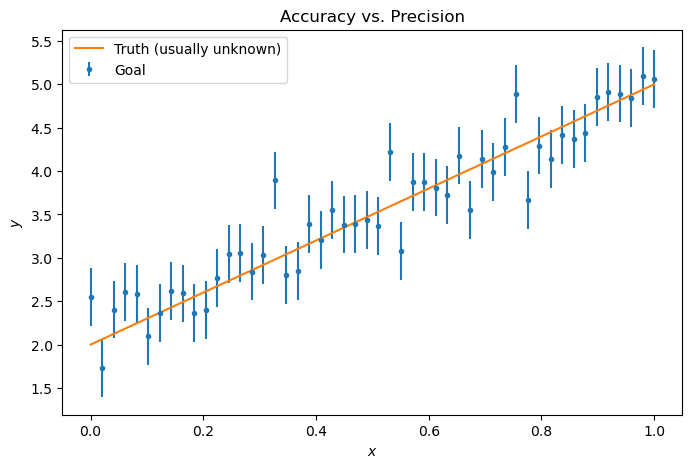

In [10]:
yc  = y + np.random.normal(0, errp, size=n) # The goal

plt.figure( figsize=(8,5) )
plt.errorbar(x, yc, ype, fmt=".", label="Goal")
plt.plot(x, y, label="Truth (usually unknown)")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Accuracy vs. Precision')
dummy = plt.legend()

## ----------------------- The different types of errors ----------------------- 
- **Illegitimate error**: a fundamental problem in the methods (measurement or computation) or assumptions (you think you’re doing one thing, but you are really doing another)
     - Finding and fixing these errors must be a big part of your planning
     - Check your work 
     - Most homework errors are in this category. You lose points when we find such errors to teach you not to do this in real science
     - think of the Mars Polar Lander inches/pounds vs. m/kg goof (e.g., https://www.latimes.com/archives/la-xpm-1999-oct-01-mn-17288-story.html), or a RT code that mixes and (mis)mathes cgs with SI units



- **Systematic error**: predictable difference between data and measurement
     - Need to quantify and remove (sometimes can be hard to identify at start).
     - A non-quantified systematic error can kill a measurement
     - Must always estimate the unquantifiable error conservatively
     - Any experimental plan must show how it will quantify and remove systematic errors well enough to get the accuracy needed.
     - Usually a major portion of any proposal (lack of this is a “red flag” for a bad proposal)
     - think of the effect of interstellar dust on your stellar flux measurements, instrumental effects (e.g., effect of TESS jitter on light curves), ramp effect of HST light curves, etc
        
        
        
- **Random error**: differences between data and measurement that can only be described probabilistically
    - Quantify, propagate through equations/analysis
    - Called the "noise"
    - Parameterized by the data’s standard deviation
    - Error bars in astronomy are 1σ (3σ in biology)
    - Minimized by repeated measurements
    - think of error in your stellar flux measurement
     
 

### Think-pair-share (15 min total):

1. Think of the erros you mentioned before with the measure tape. Classify them as illegitimate, systematic, or random [5 minutes]

2. Think of 3 examples for each category of errors (9 total) [10 minutes]

### Think-pair-share (7 min):

After taking 100 heart rates, you discover, while talking to a colleague, that 120 beats per minute is too high for a resting heart rate in a healthy adult.  You realize, too late, that your office is on the 12th floor and the elevator is broken.  People seemed out of breath when you measured them!



### Figure of merit for all measurements: Signal-to-noise ratio (S/N or SNR or SN) 

### $$SNR = \frac{\mbox{value of corrected measurement}}{\mbox{random error in that value}}$$ (see later lectures too)

### Significant figures and round off 
    - 1000. vs 1000
    - 0.32  vs 0.3  or  0.56 vs 0.6
    
    
#### Remember that:
 1. Non-zero digits are always significant (1234.5 has 5 significant digits)
 2. Zeros between non-zero digits are significant (10045 also has 5 significant digits)
 3. Leading zeros are not significant (0.01 has only 1 significant digit)
 4. Trailing zeros can be significant if after a decimal point (12.0 has 3 significant digits)

### Uncertainty: amount by which 2 measurements could differ and not be recognized as different
    - can be due to fluctuations in measurements or our theoretical models
    
### Error: usually we imply the difference between measurement and truth. 
   1. Absolue error: ∣Measured Value−True Value∣
   2. Relative error: ∣Measured Value−True Value∣ / True Value

   - Think-Pair-Share: What are the units of each? When is each one useful? Give an example for each category




### Think-pair-share (5 min)
1. Consider measuring your weight in a scale a few consecutive times. Does it give the same number?
2. Consider measuring the time it takes for a ball to fall from height h, so that you measure $\vec{g}$

#### is one measurement enough? why/why not?

### Usually though, don’t know the truth and can only get an estimate of our measurement error (repeated measurements)

### Standard error: estimate of 1σ (standard deviation) spread in measurements
### Significant difference: different by several times the uncertainty (3 or preferably more)

#### See next week for more details on error calculations

### Caution: 

- your mean and errors (see next week) should always have the same precision! Telling me that a quantity is $20.05671\pm 0.1$ does not make sense. Why? 


## ---------------------- Why do we care? --------------------

## Testing our theories. Good theories predict measurable quantities
  - We use measurements and error bars to test our hypothesis
      - Which is right?
      - What to do next?
      - Is it true?
        
  - Do the measurement.
      - If the measurements are within errors of the prediction, the data support the theory at the level of their uncertainty.
       - If it conflicts with other theory, it must provide a replacement (or appeal to data that shows the other theory to be false).
  
      - It must not make predictions that are against the data, not even one.
       - Do other predictions also fit the data? Then need better data.
       - Do other theories that depend on this one also work?
  - Usually need to wait to see if other theories appear.
  - Eventually, theory becomes accepted if it passes these tests.
  - No theory is ever immune from being overturned later!


### Case study 1

#### Assume you have the following observations of an event (xxx vs yobs). You know that the event should be described with a powerlaw but you need to figure out which one it is. You try two models (yyy and yy2) and plot your results to see which one is the best. Is there a prefered model?

In [11]:

xxx = np.array([1.00, 1.27, 1.54, 1.82, 2.10, 2.36, 2.64, 2.91, 3.18, 3.45, 3.73, 4.00 ])
yobs = np.array([0.67, 0.84, 1.15, 1.72, 2.13, 2.94, 3.57, 4.48, 5.06, 6.05, 7.27, 8.16])

yyy = np.array([0.50 , 0.81, 1.19, 1.65, 2.19, 2.79, 3.48, 4.23, 5.06, 5.97, 6.95, 8.00 ])
yy2 = np.array([0.52, 0.82, 1.18, 1.62, 2.13, 2.66, 3.29, 3.96, 4.68, 5.47, 6.34, 7.24 ])



In [12]:
# yy2 = 0.52*(xxx**1.9)
# yy = 0.5*(xxx**2)
#yobs = 0.52* xxx**2 +(np.random.randint(-1,2, size =len(xxx))*(np.random.random(len(xxx))*0.2))


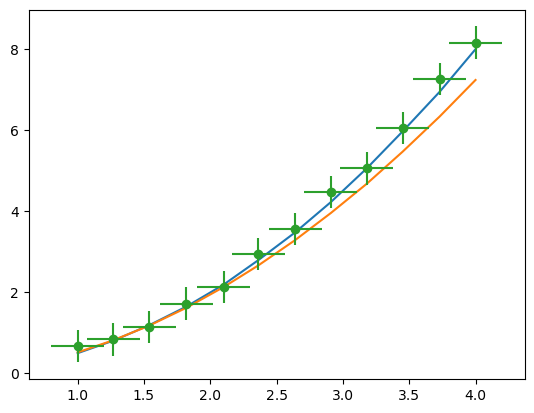

In [13]:
plt.plot(xxx, yyy, xxx, yy2)
dm=plt.errorbar(xxx, yobs, yerr = 0.4, xerr=0.2, marker = 'o', linestyle='')

### Case study 2. 
#### Assume you have two competing theoretical models for the physical law that connects the speed of an object with distance and time. Theory 1 suggests that $u = \frac{s}{t}$ and theory 2 that $u = \frac{2 * s}{t}$. You make an experiment where you measure with tape, a stopwatch and a speedometer of an object moving for various distances and with different speeds. You measured the following distances, times and speeds and the corresponding errors 

In [14]:
t     = np.linspace( 1.2, 10.2, 10 )
t_err = 0.4
s     = np.array( [ 8.2, 3.1, 2.2, 0.8, 6.7, 10.2, 10.3, 9.9, 18.1, 20.2  ])
s_err = 1.1
u     = np.array( [7.2, 1.2, 0.7, 1.1, 1.4, 0.8, 1.1, 2.0, 2.1, 1.4 ] )
u_err = 0.8

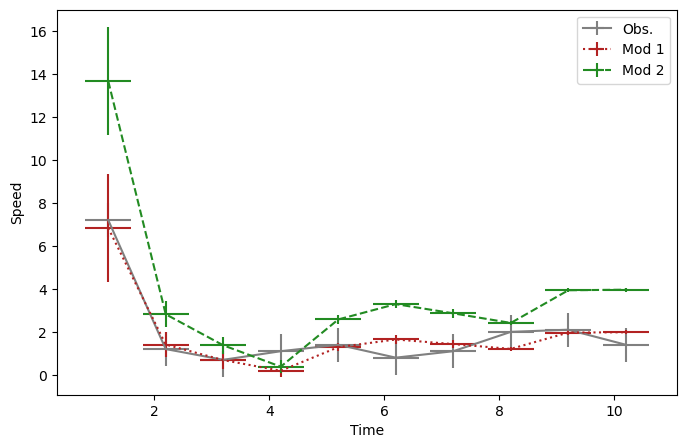

In [15]:
#let's plot our u vs t and the two theoretical models:
#overplot the model u errors, we will talk about error propagation and how you get these soon

um_err_1 = np.array([2.5, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1])
um_err_2 = np.array([4.9, 1.1, 0.7, 0.5, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3])

plt.figure( figsize=(8,5) )
plt.errorbar( t, u, xerr= t_err, yerr = u_err, label = 'Obs.', color='gray' )
plt.errorbar( t, s/t, color = 'firebrick', linestyle = ':', 
             xerr= t_err, yerr = um_err_1, label = 'Mod 1' )
plt.errorbar( t, 2* s/t, color = 'forestgreen', linestyle = '--', 
             xerr= t_err, yerr = um_err_1, label = 'Mod 2' )
plt.xlabel('Time')
plt.ylabel('Speed')
dm=plt.legend()

#### Is there a prefered model? 

### Case study 3. 
### Hubble observed a number of galaxies at different distances from the Earth and used their redshift to constrain the speeds that they were moving away/toward us. The (imaginary) data are given below. 
    - Plot the velocity of the galaxies vs their distance from us. Use whatever symbols you prefer but no line!
       
        - Try to "fit" a linear model of the form $u = A * d$ , with A = 20, 50, 70, 90 or 100 
        - Try to "fit" a second order polynomial of the form $u = B * d^2 + A * d $, with B = 20., 30. 
          and A =40, 50 
        - What kind of law would you assume the data follows? What would the best A be?
    
    [*Note: we will talk about how you actually fit data next week  ]

In [16]:
distances = np.array( [0.2, 2.0, 0.3, 1.4, 0.27, 0.45, 1.35, 0.5, 0.8, 1.1, 1.35, 0.3] )  # [Mpc]
speeds    = np.array( [ 18., 158.,  30., 105.,  20,  28, 102., 37., 63.,  83., 95.,  24.5] ) # km/s

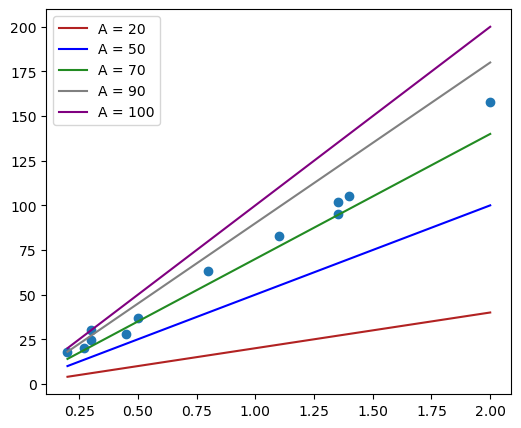

In [17]:
plt.figure(figsize=(6,5))
plt.plot(  distances , speeds, linestyle = 'none', marker = 'o')

# if you don't sort them things will get wonky in your plot:
inds = np.argsort( distances )
plt.plot( distances[ inds ] , distances[ inds ] * 20 ,  label = 'A = 20', color = 'firebrick')
plt.plot( distances[ inds ] , distances[ inds ] * 50 ,  label = 'A = 50', color = 'blue')
plt.plot( distances[ inds ] , distances[ inds ] * 70 ,  label = 'A = 70', color = 'forestgreen')
plt.plot( distances[ inds ] , distances[ inds ] * 90 ,  label = 'A = 90', color = 'gray')
plt.plot( distances[ inds ] , distances[ inds ] * 100 , label = 'A = 100', color = 'purple')

dm=plt.legend()

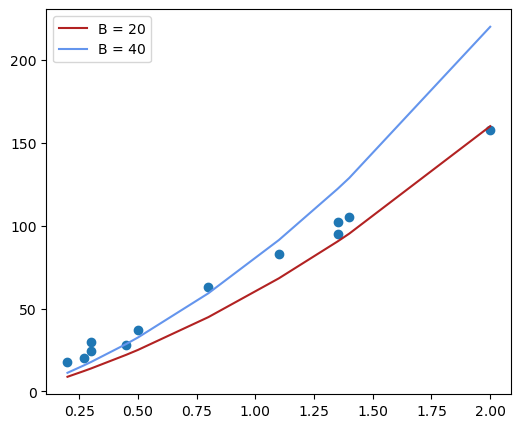

In [18]:
plt.figure(figsize=(6,5))
plt.plot(  distances , speeds, linestyle = 'none', marker = 'o')

# if you don't sort them things will get wonky in your plot:
plt.plot( distances[ inds ] , distances[ inds ]**2 * 20 +distances[ inds ] * 40 ,  
         label = 'B = 20', color = 'firebrick')
plt.plot( distances[ inds ] , distances[ inds ]**2 * 30 +distances[ inds ] * 50 ,  
         label = 'B = 40', color = 'cornflowerblue')

dm = plt.legend()

## ----------------------- Parent and Sample distributions ----------------------- 

### Pay attention to the 'data' from the plot above. Is there something that seems weird?

- observations/measurements of the same quantity give an approximate value to the 'truth'
- if had infinite measurements we would see a pattern emerging giving us the parent distribution of the measurement (what is the probability that a given measurement would be X or Y)
- of course, we have limited resources --> sample distribution 

### Let's assume that you have made N observations of a quantity:

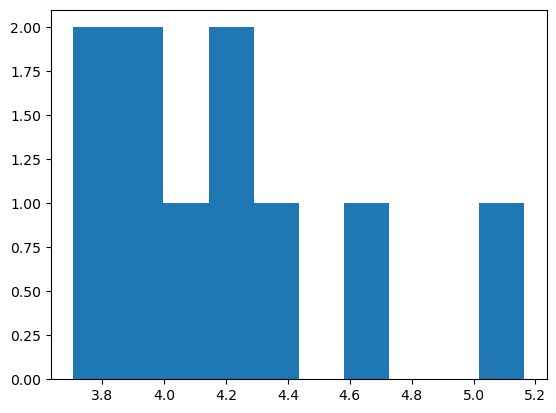

In [19]:
N = 10                            # assume you have 10 measurements
mu, sigma = 4, 0.5                 # mean and standard deviation
s = np.random.normal(mu, sigma, N) 

#let's see a histogram of our obs:
count, bins, ignored = plt.hist(s, 10)

## too few; distr. could be anything....

In [20]:
#remind them that if we forget what funct does we can always get its docstring:
#help( np.random.normal )

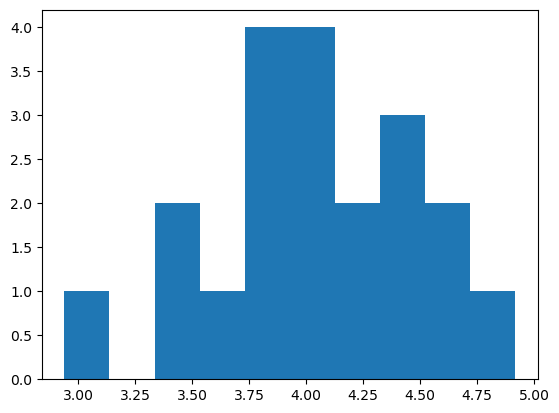

In [21]:
N = 20                            # assume you have 20 measurements
mu, sigma = 4, 0.5                 # mean and standard deviation
s = np.random.normal(mu, sigma, N) 

#let's see a histogram of our obs:
count, bins, ignored = plt.hist(s, 10)

## better (?); but can be still hard to know....

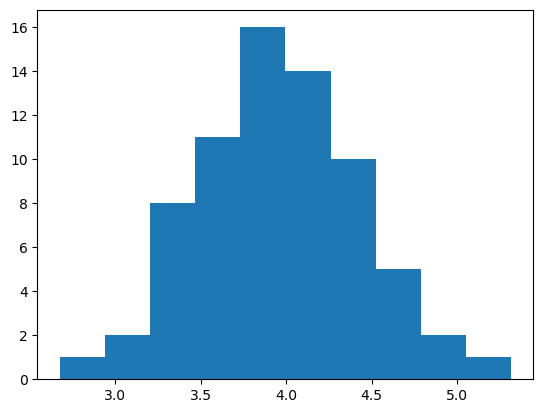

In [22]:
N = 70                            # assume you have 70 measurements
mu, sigma = 4, 0.5                 # mean and standard deviation
s = np.random.normal(mu, sigma, N) 

#let's see a histogram of our obs:
count, bins, ignored = plt.hist(s, 10)

## much better....

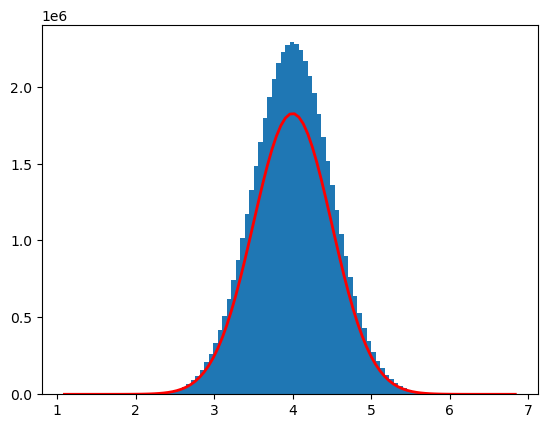

In [23]:
N = int(5e7)                            # assume you have infinite measurements (here 5e7)
mu, sigma = 4, 0.5                 # mean and standard deviation
s = np.random.normal(mu, sigma, N) 

#let's see a histogram of our obs:
count, bins, ignored = plt.hist(s, 100)

## the gaussian
dm = plt.plot(bins, np.max(count)* 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')


## -------------------------------------------------------------------------
## Start working on your peer reviews!
## -------------------------------------------------------------------------

### --------Mean, median, stand dev of our data ---------

- mean of data $\bar x$: $$\bar x = \frac{1}{N}\sum x_{i}$$


- median  $\mu_{1/2} $ :     $$ P( x_i < \mu_{1/2} ) = P( x_i > \mu_{1/2} ) =0.5  $$

- standard deviation, $\sigma = \sqrt{\mbox{var}(x_{i})}$ 
$$\sigma^{2} = \frac{1}{N-1}\sum (x_{i}-\bar x)^{2}$$ or 
$$\sigma^{2} = \frac{1}{N-m}\sum (x_{i}-\bar x)^{2}$$
        
     -  Why N-1? Our mean is calculated from the data...A data set of $N$ values can only be processed to produce up to $N$ statistics, can't make something from nothing! Similar, factor of $\frac{1}{N-m}$ takes into account effect of degrees of freedom, makes it work for low N; takes into account that we estimated $m$ values from the data to compute the formula [if we estimated the mean m =1 ; if we fit a line through data and constrain deviations from that m = 2 etc] ....could we estimate 20 parameters from 21 data points? need N >> m
        
     -  Better measure of the dispersion of data, understanding how uncertain our estimate of $\bar x$ is

In [24]:
#Let's make a dataset of random observations we made:
obs_data =  np.random.randint(0, high=222, size=1000)
#print( obs_data )

In [25]:
#calculate the mean:
data_mean = np.mean( obs_data )

print('the mean is:', data_mean )
#calculate the standard deviation:
data_sig1 = np.std( obs_data )

data_sig2 = 0
for i in range( len( obs_data ) ):
    data_sig2  += ( obs_data[i] - data_mean ) **2
data_sig2  = np.sqrt( (1/( len(obs_data) -1 ) ) * data_sig2 )

print( 'the sigma is:', data_sig1, data_sig2)  #difference comes from std not using -1 in denominator!

#vs:
print('I now define my DOF:', np.std(obs_data,ddof=1))

the mean is: 109.761
the sigma is: 64.60555610007548 64.637883125416
I now define my DOF: 64.63788312541597


In [26]:
from scipy.stats import skewnorm

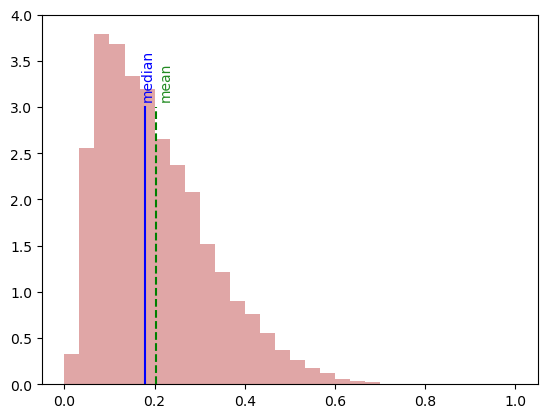

In [27]:
numV = 10000
maxV = 100
sk = 12   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = sk,loc=maxV, size=numV)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 

#Plot histogram to check skewness
count, bins, ignored = plt.hist(random,30,density=True, color = 'firebrick',alpha =.4)
plt.plot( [np.mean(random), np.mean(random)], [0., 3] , 'g--')
plt.plot( [np.median(random), np.median(random)], [0., 3],'b' )
plt.ylim(0, 4)

plt.text(np.mean(random)+.005, 3.1 ,'mean', color='forestgreen', rotation = 90)
dm =plt.text(np.median(random)-.01, 3.1 ,'median', color='blue', rotation = 90)


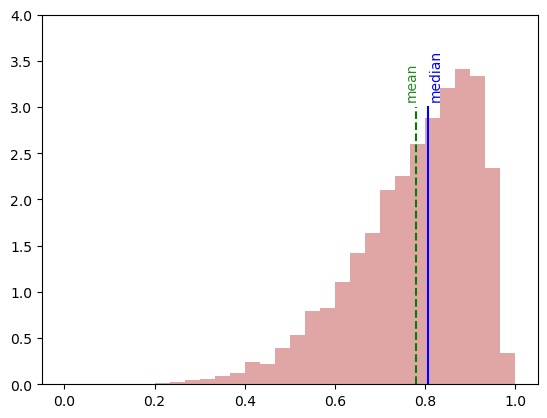

In [28]:
numV = 10000
maxV = 100
sk = -12   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = sk,loc=maxV, size=numV)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 

#Plot histogram to check skewness
count, bins, ignored = plt.hist(random,30,density=True, color = 'firebrick',alpha =.4)
plt.plot( [np.mean(random), np.mean(random)], [0., 3] , 'g--')
plt.plot( [np.median(random), np.median(random)], [0., 3],'b' )

plt.ylim(0, 4)

plt.text(np.mean(random)-.025, 3.1 ,'mean', color='forestgreen', rotation = 90)
dm =plt.text(np.median(random)+.002, 3.1 ,'median', color='blue', rotation = 90)


### --------Probabilites ---------

### Probability density function (PDF; p(x) ) gives the likelihood that a given value would be observed in the sample is. From Bev: "in the limit of a very large number of observations, the fraction d$N$ of observations of the variable $x$ that yield values between $x$ and $x$ + d$x$ is given by d$N$ = $Np (x)$ d$x$"

### Discrete or continuous?

#### Discrete probability
- Variable can have only a finite set of values
- System is in exactly one of a finite number of possible states
- Each state has a probability of happening
- Range: 0-1, 0 = never happens, 1 = certainly happens
- Often given as percentage or fraction
    
     - Can you think of examples? 
     

#### Continuous probability
- Variable can have an infinite set of values
- Random variable has a single value of infinitely many possible values
- A continuous **probability density function (PDF)** expresses what values are more or less likely
  - PDF is non-negative
  - PDF integrates to 1
$$\int_{-\infty}^{\infty} p(x) dx = 1$$
  - Probability that the state is in a given range is a definite integral over that range:
$$P(x_i \mbox{ in range } [a,b)) = \int_{a}^{b} p(x) dx$$
 - Can you think of examples?
 - What are the units on $p(x)$?
 

#### Discrete or continuous?
- coin toss
- cars entering an intersection per hour
- calories burned during exercise
- number of photons collected 
- die roll
- measurement of person's height with infinite precision 


#### What is the probability that you get heads in a fair coin toss? What is $p(x)$?
#### What is the probability that you get a 2 in a fair die roll? What is $p(x)$? What is $\Sigma p(x)$?

#### Discrete:  
   - mean: $\frac{1}{N}\Sigma_i x_i p(x_i) $
   - variance: $\sigma^{2} = \Sigma_i(x_i - \bar x)^{2} p(x_i)$
   - expectation value: $<f(x)> = \Sigma_i f(x_i)p(x_i)$
   
#### Continuous:
   - mean: $\int_{-\infty}^{\infty}x p(x) dx$
   - variance: $\sigma^{2} = \int_{-\infty}^{\infty}(x - \bar x)^{2} p(x) dx$
   - expectation value: $<f(x)> = \int_{-\infty}^{\infty} f(x) p(x) dx $ 
   
- mean is also the **expected value of** $x = \langle x\rangle$
- variance is the **expected value of** ${(x - \mu)^{2}}$, the square of the **deviations from the mean**
- **standard deviation**: $\sigma$

## -----------------
## We will have a few In-Class Assignments that require you to write a few (or more) lines of code. If a time limit is given, you have that amount of time to write up a solution. At the end of the time you need to copy your code into Webcourses. This counts toward your participation grade.

## ICA
#### 1. (2 minutes) You have rolled a die and got these results:  
[ 3, 1, 3, 2, 5, 6, 1, 4, 5, 6, 2, 6, 3, 1, 4, 3, 1, 6  ]   
What is the mean of your data? what is the median? 

- what is the most probable/expected value of your roll of the die?



In [29]:
import numpy as np

In [30]:
roll_results = np.array( [ 3, 1, 3, 2, 5, 6, 1, 4, 5, 6, 2, 6, 3, 1, 4, 3, 1, 6  ] )


mean_roll = np.mean( roll_results )
med_roll  = np.median( roll_results )

exp_value = (1/6)* np.sum( np.arange(1,7) )
exp_val2 = ( (4/len(roll_results))*1 + (2/len(roll_results))*2+ (4/len(roll_results))*3 +
           4*2/len(roll_results)+5*2/len(roll_results)+6*4/len(roll_results))
print( mean_roll, med_roll, exp_value, exp_val2)

3.4444444444444446 3.0 3.5 3.4444444444444446


### Key probability functions for astro: Poisson & Gaussian

### Poisson distribution: 
"describes the probability $P(x; n, p)$ of observing x events per time interval out of n possible events, each of which has a probability p of occurring" 
- possible events n >>>>1, and usually unknown
- also, p is usually unknown, but for a uniform occurence rate p of events in time or space we get:


$P(x,t|n) = \frac{(t/\tau)^{x}}{x!}e^{-t/\tau} = \frac{(tn)^{x}}{x!}e^{-tn} $ (probability of getting $x$ events in time $t$ if there are an average of $n$ events per unit of time)  

<!--  $\tau$ is connected to the average time interval between events -->



$$P(x,N) =  \frac{N^{x}}{x!}e^{-N}$$

where N is the average number of events we get in time t.


- normalized function: $\Sigma_{x=0}^\infty P(x,N) = \Sigma_{x=0}^\infty  \frac{N^{x}}{x!}e^{-N} = e^{-N} \Sigma_{x=0}^\infty  \frac{N^{x}}{x!} = e^{-N} * e^{N} = 1$

- discrete probability distribution! 


<br>
<br>


- any time uncertainties are not due to a systematic issue (e.g., sth wrong with our detector) but due to "statistical fluctuations in the collections of finite numbers of counts over finite intervals of time" we are dealing with statisticall uncertainties $\rightarrow$ Poisson distr. for our data & we can get $\sigma$ from our data



- prime example: light (e.g., measuring flux from a star follows poisson statistics)


- $\bar x = \Sigma_{x=0}^\infty  x \frac{N^{x}}{x!}e^{-N} = N e^{-N} \Sigma_{x=0}^\infty \frac{N^{(x-1)}}{(x-1)!} = N e^{-N} e^N = N $ $\rightarrow$

<div class="alert alert-block alert-info">
 $$\bar x = N$$


- $\sigma^2 = <x^2> - <x>^2 = <x^2> -N^2 $ but: $<x^2> = < x (x-1)> + <x>  = < x (x-1)> +N $ and $< x (x-1)>  =  \Sigma_{x=0}^\infty x (x-1) \frac{N^{x}}{x!}e^{-N} = N^2 e^{-N} e^N = N^2  $ so that $\sigma^2 = N^2 + N -N^2 =N $ $\rightarrow$

<!-- \Sigma_{x=0}^\infty x (x-1) \frac{N^{x}}{x!}e^{-N} = \Sigma_{x=0}^\infty e^{-N} N^2 \frac{N^{x-2}}{(x-2)!}  -->

<div class="alert alert-block alert-info">
 $$\sigma = \sqrt{N}$$
 


- $\bar x$ is signal and $\sigma$ is noise, so the SNR is:

> $$\mbox{SNR} = \frac{\bar x}{\sigma} = \frac{N}{\sqrt{N}} = \sqrt{N}$$

- Quality of data improves as $\sqrt{\mbox{number of counts}}$
- ...IF uncorrected systematics are well below $\sigma$!

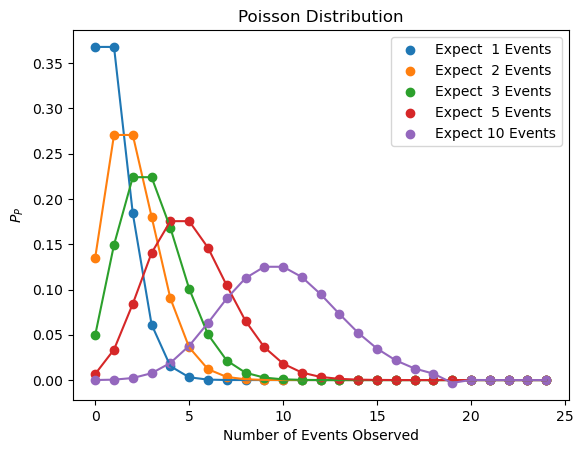

In [31]:
# Poisson function: return probability of observing x events if N events expected
import scipy.special as ssp  # math.factorial() doesn't take NumPy arrays!

def poisson(x, N):
    return N**x / ssp.factorial(x) * np.exp(-N)

# parameters
N = np.array((1, 2, 3, 5, 10))
x = np.arange(0, 25)

# plot
for i in N:
    plt.scatter(x, poisson(x, i), label="Expect %2d Events"%i )
    plt.plot(   x, poisson(x, i))

plt.xlabel("Number of Events Observed")
plt.ylabel("$P_P$")
plt.title("Poisson Distribution")
dm = plt.legend()

### Gaussian distribution: 
### Gaussian is the limiting case of Poisson as number of events gets large 
<div class="alert alert-block alert-info">
$$ p(x) = \frac{1}{\sigma \sqrt 2\pi} \mathrm{exp}[-\frac{1}{2} (\frac{x-\mu}{\sigma})^2]$$

#### Note that the more events we expect in Poisson, the more Gaussian it looks...
- ...but there is no probability between the points.  They just follow a Gaussian-ish envelope.
- For large $N$, Poisson approaches a Gaussian with  $\bar x = N$ and $\sigma = \sqrt{N}$
- It's not just any Gaussian. The mean and standard deviation are locked together!
- On the plots below, compare how the approximation improves:

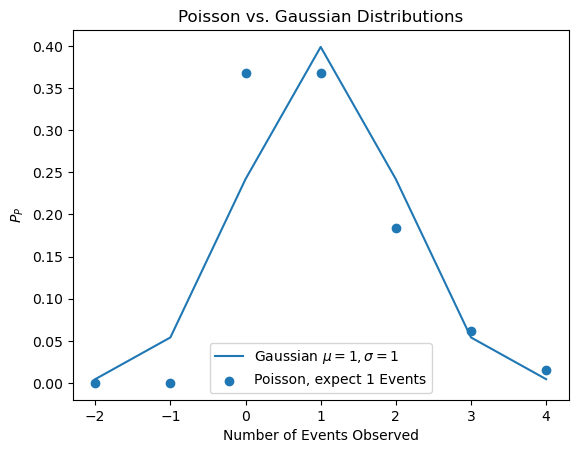

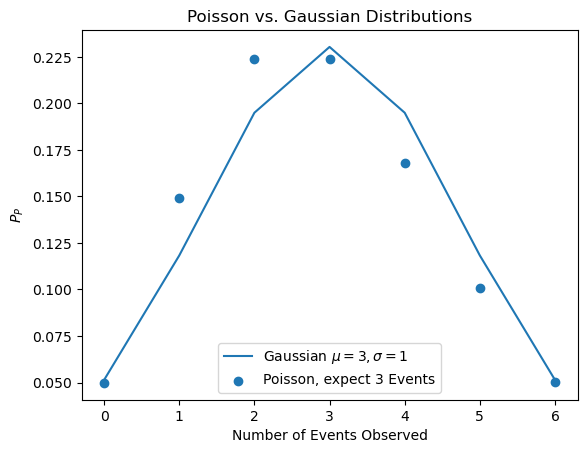

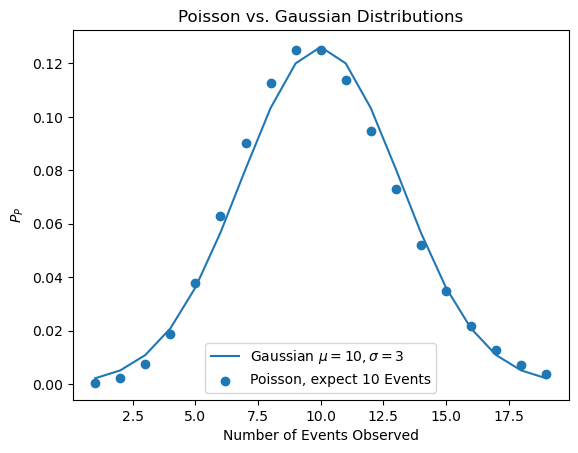

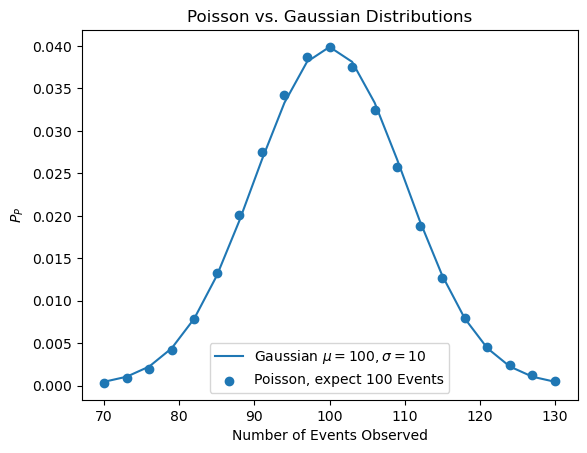

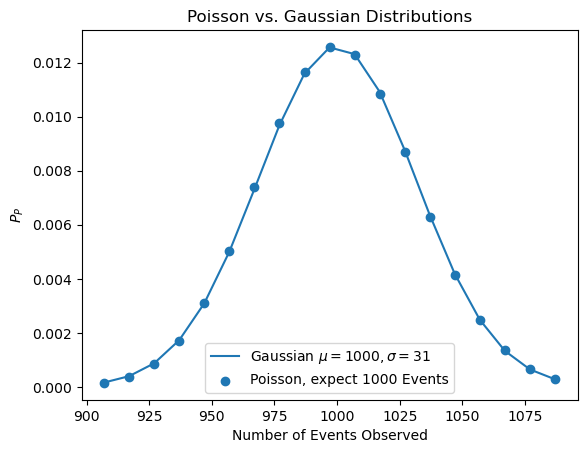

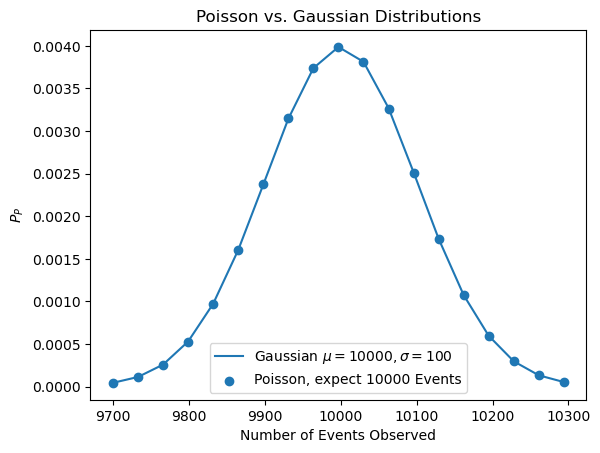

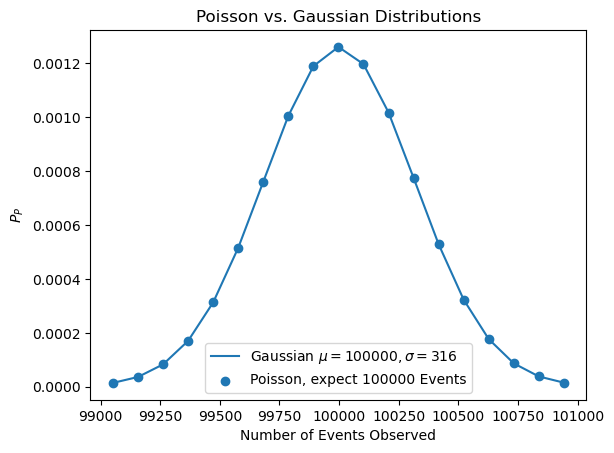

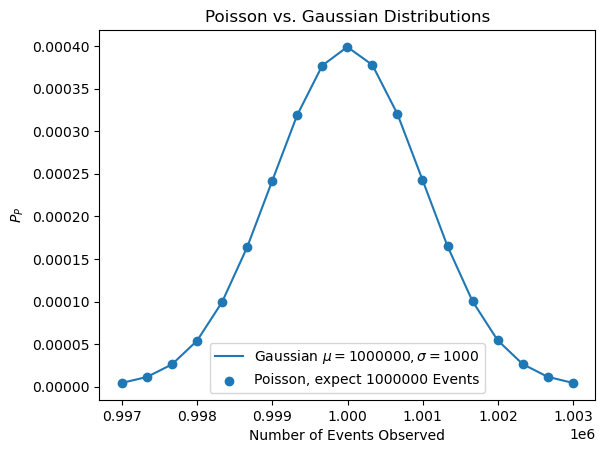

In [32]:
import scipy.stats as sst    # for Poisson

# We'll use the SciPy Poisson function scipy.stats.poisson.pmf(), because
# the regular formula has a factorial in the denominator, which underflows
# if N=1000000.  But, that times 1000000**1000000 is ok.  SciPy has a version of the
# formula that doesn't underflow.

# parameters
N = np.array((1, 3, 10, 100, 1000, 10000, 100000, 1000000))
s = np.int64(np.sqrt(N))
#x = np.arange(max(N) + 3 * s + 1)

# plot
for i in range(len(N)):
  plt.figure()
  x = np.arange(N[i] - 3 * s[i],
                N[i] + 3 * s[i] + 1,
                max(1, s[i] // 3))
  plt.plot(   x, sst.norm.pdf(x, N[i], N[i]**0.5), label="Gaussian $\mu=%d, \sigma=%d$"%(N[i], s[i]) )
  plt.scatter(x, sst.poisson.pmf(x, N[i]), label="Poisson, expect %d Events"%N[i] )
  plt.xlabel("Number of Events Observed")
  plt.ylabel("$P_P$")
  plt.title("Poisson vs. Gaussian Distributions")
  plt.legend()


- **Confidence interval**: probability that a draw lies inside a given range.
- A confidence interval is the scientific statement of how well you know something.
- For a Gaussian (and **ONLY** for a Gaussian!):
- 1$\sigma$ = 68% of measurements closer to mean than this
- 2$\sigma$ = 95% of measurements closer to mean than this
- 3$\sigma$ = 99% of measurements closer to mean than this
- The 3$\sigma$ confidence interval for a Gaussian is 99%.
- The error bar indicates a confidence interval.

#### 2. You observed a variable target 2M2228 and got its photometry at different HST and Spitzer bands over a full period. Data are stored in file *lightcurves_nobin.fits*. Read the astropy fits documentation (https://docs.astropy.org/en/stable/io/fits/) to figure out how to get all data in a single array. Knowing that the fits file contains the periods in the primary ( [0] ) HDU and then the photometry is in the [1] HDU store them in arrays ***periods*** and ***all_data***. 

#### ***all data*** contains the photometry for the following 27 bands (from Manjavacas+2019):

<img src="plots/2M2228_spectralcurves_spitzer.png" width=800 height=800 />

#### with element 0 being the photometry at 1.104$\mu$m, element 1 the error in the photometry of 1.104$\mu$m etc.....Plot in a single plot the photometry at: 1.128,  1.361, 1.431 and 4.5 $\mu$m. Overplot the corresponding errorbars (tip: to make the plot legible, shift each lightcurve by a small amount)
- What do you observe? 
- Calculate the max and min flux observed in each of these four bands. Calculate the mean and uncertainty of the fluxes.


#### 3. (20 minutes) The satellite MODIS observed the Earth on 18 May 2013 and recorded (among other things) the cloud optical thickness $\tau$ [unitless] and altitude $h$ [m]. The data were binned to a $2^\circ \times 2^\circ$ grid for convenience, and can be found in files ***cloud_tau.csv*** and ***cloud_alt.csv*** respectively. Columns on these tables correspond to longitudes (from 180 W to 180 E with $2^\circ$ intervals), rows are latitudes (from 90 N to 90 S with $2^\circ$ intervals). If data are missing for a given bin it is marked with a value < 0 (why do we do this?)
- Read the data into appropriately named variables.
- Make a publication ready plot that shows the $\tau$ and height of the clouds as function of longitude at the equator. Use the appropriate method to plot the two graphs one on top of the other.
- What is the mean $\tau$ of clouds across the globe? 
- What is the mean $\tau$ of clouds in the tropics (assume $\pm22^\circ$)?
- What is the mean $\tau$ of clouds in mid-latitudes (assume $\pm30^\circ$ to $60^\circ$)? 

    -What do you observe when comparing these $\tau$s?
    
- What is the mean $h$ of clouds in the tropics and mid-latitudes? How do they compare and why?
- What is the uncertainty of your $\tau$ and $h$ in the tropics?